In [1]:
%load_ext cython
%matplotlib notebook


import numpy as np
from ipywidgets import interact
import numpy as np
from matplotlib import pyplot as plt

def magnetization(img):
    return np.sum(img)/np.prod(img.shape)

In [2]:
%%cython
cimport cython

import numpy as np
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_ising_energy(np.int64_t[:, :] field):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    cdef int n, m
    cdef float total_E = 0
    cdef float row_E = 0 
    for n in range(N):
        row_E = 0 
        for m in range(M):
            total = 0
            for i in range(n-1, n+2):
                for j in range(m-1, m+2):
                    if i == n and j == m:
                        continue
                    total += field[i % N, j % M]
            row_E += - field[n, m] * total
        total_E += row_E
    return total_E /(N * M)

* Introduce Ising model in 1D
* Explain Monte Carlo, Explain Correlation Function
* Explain Magentization, show magentization as a function of temperature
* Introduce 2D Model
* Prompts about simulation results at 3 temperatures
* What do you expect the autocorrelation to look like in these cases? Plot them.
* Simulate at beta 0.1 to 0.3 - ten 

In [3]:
import glob

In [4]:
import h5py

In [5]:
from collections import defaultdict

In [7]:
magnetization_by_temperature = defaultdict(list)
energy_by_temperature = defaultdict(list)
images_by_temperature = defaultdict(list)
for filename in glob.glob('run_*.hdf5'):
    with h5py.File(filename,'r') as input_file:
        beta = input_file.attrs['beta']
        img = np.array(input_file['image'])
        magnet = magnetization(img)
        energy = cy_ising_energy(img)
        magnetization_by_temperature[beta].append(magnet)
        energy_by_temperature[beta].append(energy)
        images_by_temperature[beta].append(img)

In [8]:
from matplotlib.gridspec import GridSpec

In [9]:
beta = 0.21
def show_data(beta):
    gs = GridSpec(ncols=5, nrows=25)
    betas = magnetization_by_temperature.keys()
    all_energies = []
    all_magnets = []
    all_betas = []
    for b in betas:
        all_energies.extend(energy_by_temperature[b])
        all_magnets.extend(magnetization_by_temperature[b])
        all_betas.extend([b]*10)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(gs[0:9, :])
    ax.plot(all_betas, all_magnets, 'ok', alpha= 0.3)   
    ax.plot([beta] * 10, magnetization_by_temperature[beta], 'or', alpha= 1.0)
    ax.set_xlabel("beta")
    ax.set_ylabel("Magnetization")
    ax = fig.add_subplot(gs[11:17, :])
    ax.plot(all_betas, all_energies, 'ok', alpha= 0.3)
    ax.plot([beta] * 10, energy_by_temperature[beta], 'or', alpha= 1.0)
    
    ax.set_xlabel("beta")
    ax.set_ylabel("Energies")

    for i in range(2):
        for j in range(5):
            ax = fig.add_subplot(gs[19 + 3*i : 22 + 3*i, j])
            ax.imshow(images_by_temperature[beta][2*i + j], 'gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

<IPython.core.display.Javascript object>


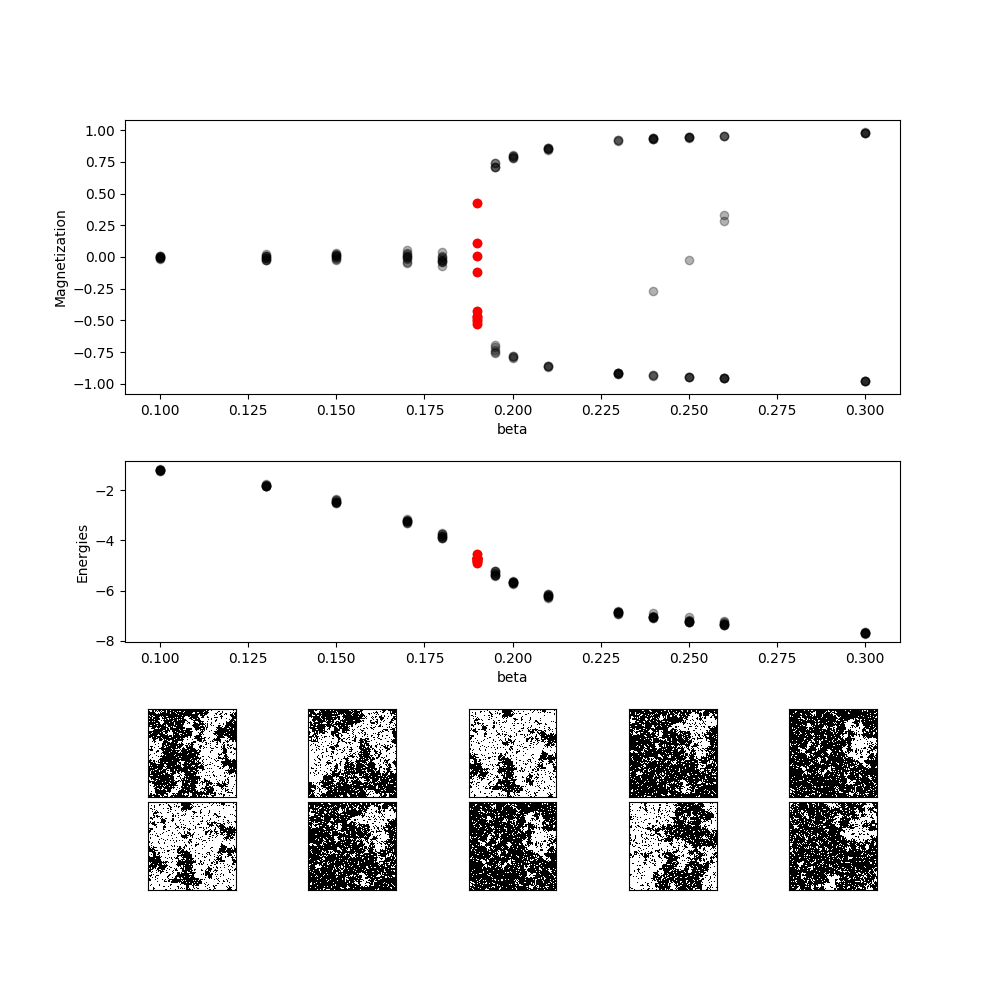

In [11]:
show_data(0.19)